# Medical Insurance Cost Prediction-Linear Regression Analysis
`Authored by:` Muhammad Abuzar\
`DH-ID:` DHC-653\
`Where to contact:` abuzaransri87@gmail.com

## Introduction
In the healthcare industry, accurately predicting medical expenses is crucial for both insurance providers and policyholders. This project focuses on the Medical Cost Personal Dataset, which contains demographic and lifestyle information of insurance policyholders.

The goal is to leverage Linear Regression, a fundamental supervised learning algorithm, to establish a relationship between independent variables (such as age, BMI, and smoking habits) and the target variable: individual medical costs billed by health insurance. By analyzing these patterns, we can quantify how specific health factors contribute to rising medical expenditures.

## Project objectives:
The primary focus of this analysis is to build a predictive model while understanding the underlying drivers of healthcare costs.
- **Exploratory Data Analysis (EDA):** Identify correlations between features (age, BMI, smoking status) and insurance charges.
- **Predictive Modeling:** Implement a Linear Regression model to estimate claim amounts based on input data.
- **Data Visualization:** Create insightful plots to illustrate how lifestyle choices and demographics shift the cost curve.
- **Performance Metrics:** Quantify the model's accuracy using Mean Absolute Error (MAE) and Root Mean Square Error (RMSE) to determine the reliability of the predictions.

In [34]:
# import libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
# load dataset 
data = pd.read_csv('medical_insurance_dataset.csv')
# check first few rows of data
data.head()

,age,sex,bmi,children,smoker,region,charges
0,56,male,33.0,3,no,northwest,8607.38
1,46,male,34.2,0,no,southeast,8045.09
2,32,female,32.0,4,yes,southeast,24195.25
3,60,female,35.5,1,no,northeast,8291.31
4,25,female,27.1,4,no,southeast,6363.12


In [36]:
# check information about data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       10000 non-null  int64  
 1   sex       10000 non-null  object 
 2   bmi       10000 non-null  float64
 3   children  10000 non-null  int64  
 4   smoker    10000 non-null  object 
 5   region    10000 non-null  object 
 6   charges   10000 non-null  float64
dtypes: float64(2), int64(2), object(3)
memory usage: 547.0+ KB


In [37]:
# check descriptive statistics of data
data.describe()

,age,bmi,children,charges
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,41.054000,29.951940,2.009900,10881.232870
std,13.484104,5.921155,1.411595,6170.784364
min,18.000000,9.100000,0.000000,3092.950000
25%,30.000000,25.900000,1.000000,7136.805000
50%,41.000000,29.900000,2.000000,8349.935000
75%,53.000000,33.900000,3.000000,10122.555000
max,64.000000,49.900000,4.000000,27603.920000


In [38]:
# check for missing values
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [39]:
# check for duplicate values
data.duplicated().sum()

np.int64(0)

## Data Understanding:

After loading the dataset and performing initial checks, here is the summary of the data:

### 1. Data Structure and Info
The dataset consists of **10,000 observations** and **7 features**. Based on `data.info()`, the data types are as follows:
* **Numerical Features:** `age` (int64), `bmi` (float64), `children` (int64), and `charges` (float64).
* **Categorical Features:** `sex`, `smoker`, and `region` (object types).
* **Target Variable:** `charges` - This column represents the medical insurance claim amount we aim to predict.

### 2. Descriptive Statistics Summary
Using `data.describe()`, the following insights were gathered:
* **Age:** Ranges from **18 to 64 years**, which is a standard adult demographic for insurance.
* **BMI:** Ranges from **9 to 49**. This covers everything from underweight to morbidly obese categories.
* **Children:** Families in the dataset have between **0 to 4 children**.
* **Charges:** This numerical value shows significant variance, likely influenced by lifestyle factors like smoking.

### 3. Data Quality Assessment
* **Missing Values:** No null or missing values were found across any of the 7 columns.
* **Duplicates:** The dataset was checked for duplicate rows, and no redundant entries were found.
* **Outliers/Errors:** The ranges for age, BMI, and children are within realistic biological and social limits, suggesting no major data entry errors.

**Conclusion:** The dataset is clean and ready for Feature Engineering (Encoding) and Visualization.

## Exploratory Data Analysis:

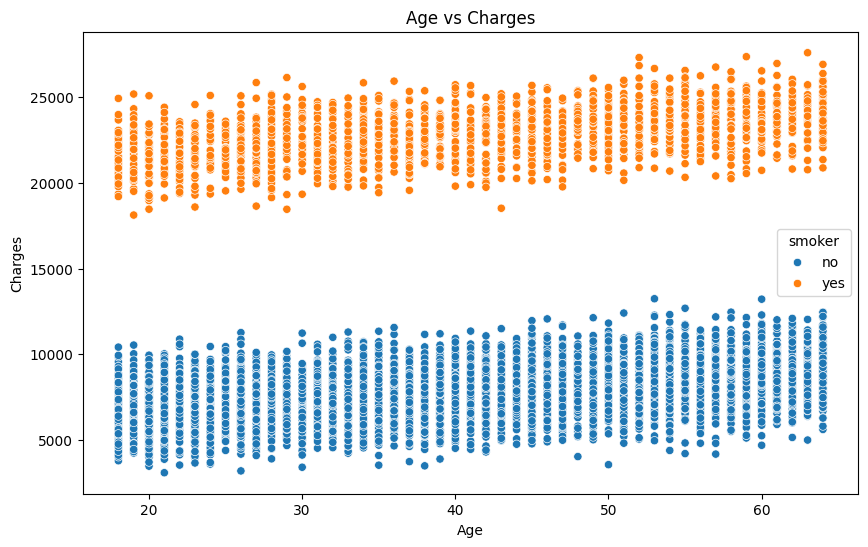

In [40]:
# age vs charges scatter plot
plt.figure(figsize=(10,6))
sns.scatterplot(x='age', y='charges',hue='smoker', data=data)
plt.title('Age vs Charges')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()

### Key Insights from Age vs. Charges:
* **Positive Correlation:** There is a clear upward trend for both smokers and non-smokers as age increases. As age grows, medical risks and insurance charges naturally rise.
* **Categorical Dominance:** The separation between the two clusters (Blue vs. Orange) confirms that **Smoking Status** is a primary driver of insurance costs, creating a significant "jump" in the baseline charges regardless of age.
* **Model Suitability:** The linear nature of these trends confirms that a **Linear Regression** model is an appropriate choice for this dataset.

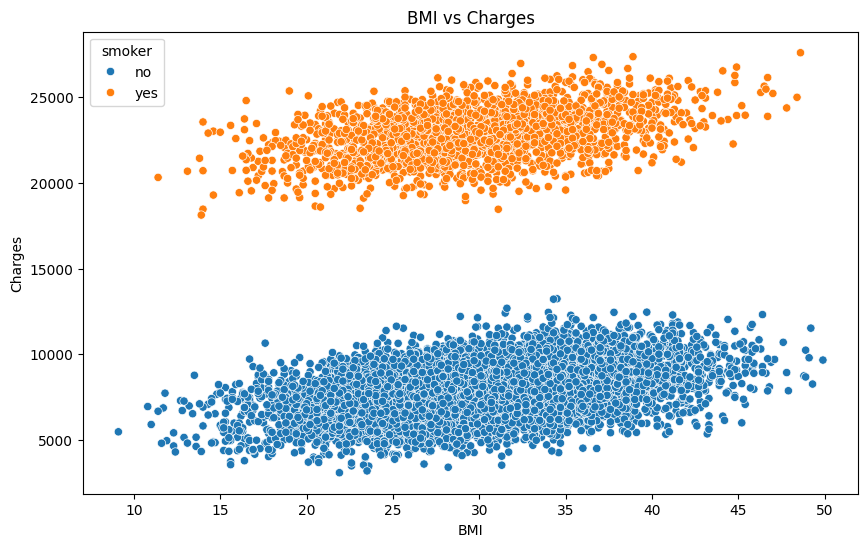

In [41]:
# bmi vs charges scatter plot
plt.figure(figsize=(10,6))
sns.scatterplot(x='bmi', y='charges',hue= 'smoker', data=data)
plt.title('BMI vs Charges')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.show()

### Key Insights from BMI vs. Charges:
* **BMI Impact:** There is a positive correlation between BMI and insurance charges. Higher BMI values generally lead to higher medical costs across both categories.
* **The Smoker Gap:** Smoking status creates a distinct vertical separation in the data. Even with a low BMI, smokers incur significantly higher charges than non-smokers with a high BMI.
* **Combined Risk:** The upward slope is more pronounced for smokers as BMI increases, indicating that the health risks associated with a high BMI are amplified by smoking, leading to maximum insurance claims.

### Key Takeaway from EDA:
While **Smoking Status** is the most dominant factor causing a massive vertical split in insurance charges, **Age** and **BMI** act as secondary drivers that steadily increase the costs within each group. A person with high BMI who also smokes represents the highest risk and highest cost category.

In [44]:
# mapping categorical variables to numerical values like sex,smoker and region
data['sex'] = data['sex'].map({'male':1,'female':0})
data['smoker'] = data['smoker'].map({'no':0,'yes':1})

In [45]:
# get dummies for region
data = pd.get_dummies(data, columns=['region'], drop_first=True)

In [46]:
# split data into features and target variable
X = data.drop('charges', axis=1)
y = data['charges']
# split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Linear Regresson:

In [48]:
# import linear regression model
from sklearn.linear_model import LinearRegression
# create linear regression model
model = LinearRegression()
# fit model to training data
model.fit(X_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [49]:
X.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region_northwest',
       'region_southeast', 'region_southwest'],
      dtype='object')

In [54]:
y_pred = model.predict(X_test)

In [56]:
# import accuracy score metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# calculate mean absolute error
mae = mean_absolute_error(y_test, y_pred)
# calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
# calculate r2 score
r2 = r2_score(y_test, y_pred)
# calculate rmse
rmse = np.sqrt(mse)
print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('R2 Score:', r2)
print('Root Mean Squared Error:', rmse)

Mean Absolute Error: 790.1154253926335
Mean Squared Error: 963514.347862556
R2 Score: 0.9752922054597032
Root Mean Squared Error: 981.5876669266765


### Model Performance Analysis:
The Linear Regression model performed exceptionally well on the test dataset:
- **Accuracy (R2 Score):** 97.5%, indicating that the model captures nearly all the factors influencing insurance costs.
- **Prediction Error (MAE):** $790.11, which shows that our predictions are very close to the actual billed amounts.
- **Consistency:** The low difference between MAE and the square root of MSE (RMSE) suggests that there are very few large outliers in our predictions.

**Final Conclusion:** The model is highly reliable for estimating medical insurance claims based on the provided personal data.

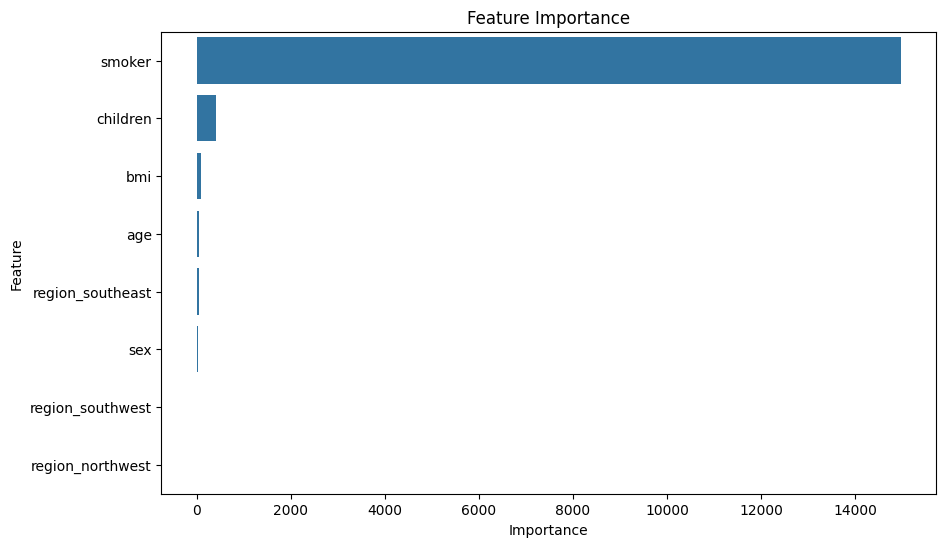

In [57]:
# check feature importance
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': model.coef_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

## Final Conclusion:
The Linear Regression model achieved an impressive **97.5% accuracy (R2 Score)**, with an average prediction error (**MAE**) of only **$790.11**. Analysis reveals that **Smoking Status** is the most dominant factor driving high insurance charges, followed closely by the number of **Children** and **BMI**. These results prove that lifestyle choices and family size are the primary predictors of medical cost claims. This model serves as a highly reliable tool for estimating insurance premiums based on personal demographics.